## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")

b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
df['converted'].describe()

count    294478.000000
mean          0.119659
std           0.324563
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: converted, dtype: float64

Check to see how converted is indicated. This indicates a boolean. 1 being true and 0 being false. 

In [6]:
df.groupby('converted').size()

converted
0    259241
1     35237
dtype: int64

In [7]:
users_converted = (35237/294478)*100
print(users_converted)

11.96591935560551


e. The number of times the `new_page` and `treatment` don't line up.

In [8]:
df.groupby(['group', 'landing_page']).size().reset_index(name='counts')

,group,landing_page,counts
0,control,new_page,1928
1,control,old_page,145274
2,treatment,new_page,145311
3,treatment,old_page,1965


3893 is the number of times treatment and new_page do not line up

f. Do any of the rows have missing values?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Both group and landing_page have all non-null objects and therefore do not have missing values. 

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
df2 = df[((df['group'] == 'treatment') & (df['landing_page'] == 'new_page'))| ((df['group'] == 'control') & (df['landing_page'] == 'old_page')) ]

In [11]:
df2.groupby(['group', 'landing_page']).size().reset_index(name='counts')

,group,landing_page,counts
0,control,old_page,145274
1,treatment,new_page,145311


In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


773192 is the duplicated user ID

c. What is the row information for the repeat **user_id**? 

In [15]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [17]:
df2 = df2[df2['timestamp'] != '2017-01-14 02:55:59.590927']

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [19]:
#make sure dupes are removed)
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2.groupby(['converted']).size().reset_index(name='counts')

,converted,counts
0,0,255831
1,1,34753


In [21]:
(34753/(255831+34753))*100

11.959708724499627

b. Given that an individual was in the `control` group, what is the probability they converted?

In [22]:
df2.groupby(['group','converted']).size().reset_index(name='counts')

,group,converted,counts
0,control,0,127785
1,control,1,17489
2,treatment,0,128046
3,treatment,1,17264


In [23]:
(17489/(127785+17489))

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [24]:
17264/(128046+17264)

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
df2.groupby(['group']).size().reset_index(name='counts')

,group,counts
0,control,145274
1,treatment,145310


In [26]:
(145310/(145274+145310))

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

From our initial findings, we find that the treatment group has a lower probability of converting. We see the treatment conversion probability of conversion at .1188 and the control group prbability of conversion at .1204. We'll need to do further testing to see if this is a statistically significant difference indicating that the treatment leads to lower conversions or if the differences are not statistically significant and neither control nor treatment are more effective than the other. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Our null hypothesis is the conversion rate on the old page is less than or equal to that of the conversion rate on the new page. Our alternative hypothesis is that the conversion rate on the new page is greater than that of the conversion rate on the old page. 

H0 : P_new - P_old <= 0
Ha : P_new - P_old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [27]:
P_new = df2['converted'].mean()
print(P_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [28]:
P_old = df2['converted'].mean()
print(P_old)

0.11959708724499628


c. What is $n_{new}$?

In [29]:
n_new = df2[df2.landing_page == 'new_page'].user_id.count()
print(n_new)

145310


d. What is $n_{old}$?

In [30]:
n_old = df2[df2.landing_page == 'old_page'].user_id.count()
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
new_page_converted = np.random.choice([1, 0], size=n_new, p=[P_new, (1-P_new)])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.choice([1, 0], size=n_old, p=[P_old, (1-P_old)])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In order to compare these, new_page_converted and old_page_converted need to be the same size. We'll check their lengths and remove the bottom n rows of whichever is longer. 

In [33]:
print(len(new_page_converted))

145310


In [34]:
print(len(old_page_converted))

145274


In [35]:
new_page_converted = new_page_converted[:145274]
print(len(new_page_converted))

145274


now that new and old are both the same length, we can compare P_new - P_old

In [36]:
P_diff = (new_page_converted/n_new)-(old_page_converted/n_old)
print(P_diff)

[ 0.00000000e+00 -6.88354420e-06  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  6.88183883e-06]


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [45]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[P_new, (1-P_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[P_old, (1-P_old)]).mean()
    difference = (new_page_converted)-(old_page_converted)
    p_diffs.append(difference)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [46]:
# columns
columns_new = ['difference']

diffs_df = pd.DataFrame(p_diffs, columns=columns_new)

[Text(0,0.5,'Frequency'),
 Text(0.5,0,'Difference'),
 Text(0.5,1,'Difference Between New_page_converted and Old_Page_Converted')]

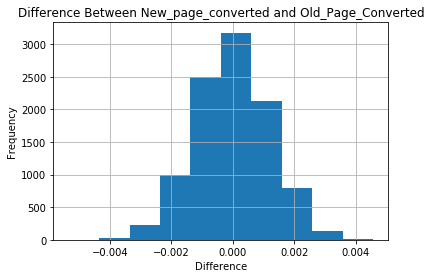

In [47]:
hist = diffs_df['difference'].hist()
hist.set(xlabel="Difference", ylabel="Frequency", title= "Difference Between New_page_converted and Old_Page_Converted")

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [48]:
diffs = df2[df2['group'] == 'treatment']['converted'].mean() -  df2[df2['group'] == 'control']['converted'].mean()
diffs

-0.0015782389853555567

In [49]:
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00047028,  0.00057616,  0.00090644, ..., -0.00016031,
        0.00072041,  0.00014239])

In [50]:
(diffs < p_diffs ).mean()

0.9045

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

.907 is the P-value, or the chance of seeing the observed, or more extreme, when the Null Hypothesis is true. This P value is not statistically significant as P is not < .05. Therefore, we cannot reject the null hypothesis as we did not find indication that the new page led to more conversions. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [51]:
import statsmodels.api as sm

convert_old = sum((df2[df2['group']=='treatment'])['converted'])
convert_new = sum((df2[df2['group']=='control'])['converted'])
n_old = len((df2[df2['group']=='treatment']))
n_new = len((df2[df2['group']=='control']))


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [52]:
import scipy.stats as st

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='larger')
print('Z-Score =' + str(z_score))
print('Z-Norm =' + str(st.norm.ppf(.95)))
print('P-Value =' + str(p_value))

Z-Score =-1.3109241984234394
Z-Norm =1.6448536269514722
P-Value =0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Our P-Value is very similar as our finding previously at .907. This again would indicate that we cannot reject our null hypthesis. 
Our Z-Value is within the Z-norm range (+- 1.644) and therefore we fail to reject the null hypothesis as well. 

These findings are consistant with our other approach and validate the manual method. 

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I'll use a logistic regression to predict the probability of conversion of to boolean dependant variable. The boolean indicates that a logistic regression will work well. 

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [53]:
df2['intercept'] = 1
df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.drop(['control'], axis=1, inplace=True)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [54]:
import statsmodels.api as sm

lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [55]:
lm_outcome = lm.fit()
lm_outcome.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 08 Jan 2019   Pseudo R-squ.:               8.077e-06
Time:                        09:40:36   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value returned for ab_page is .19. This differs because our null and alternative hypotheses are different and are therefore mesuring two different phenomena. Instead of testing for less than or equal to O or greater than Zero, we are looking at our Null Hypothesis difference as equal to zero and our alternative hypothesis being not equal to zero. H0 : P_new - P_old = 0 Ha : P_new - P_old != 0. This p-value of .19 is still sufficiently large enough where we fail to reject the null hypothesis. There is not enough evidence to suggest that P_new converts more users than P_old.

We would suggest that the e-commerce website not change their landing page as doing so does not lead to more conversions. 



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to bring in other factors in order to isolate what drives an individual to convert or to not convert. Additional factors could make a better fitting model leading to deeper understanding of our customer and what their preferences are. 
Larger models can lead to more error - either model error like multicollinearity, or interpretation error. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [56]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [57]:
#what are the three countries?
df_new.groupby(['country']).size().reset_index(name='counts')

,country,counts
0,CA,14499
1,UK,72466
2,US,203619


In [58]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


In [59]:
### Fit Your Linear Model And Obtain the Results
lm2 = sm.Logit(df_new['converted'],df_new[['intercept','UK','US']])
lm2_outcome = lm2.fit()
lm2_outcome.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Jan 2019   Pseudo R-squ.:               1.521e-05
Time:                        09:40:48   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
US             0.0408      0.027      1.518      0.129      -0.012       0.093
==============================================================================
"""

When looking at this model, where we look at how country affect conversion rate  Canada is our baseline, so we interpret these results to mean that the UK has a 5.1% higher liklihood over of converting versus Canada and the US has a 4.1% higher liklihood of converting over canada. 

These results are not statistically significant at the 95% level as we nee that all of our P-values are over .05. This indicates that we cannot reject the null hypothesis that our conversion rates differ between landing page or country. 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
#AB_Page = 1 indicates that the user got the new page. Therefore our interaction variables will be country and new page.

df_new['new_CA'] = df_new['ab_page']*df_new['CA']
df_new['new_UK'] = df_new['ab_page']*df_new['UK']
df_new['new_US'] = df_new['ab_page']*df_new['US']
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,new_CA,new_UK,new_US
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,0,1,0


In [61]:
#leave out A columns as baseline
lm3 = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US', 'new_UK', 'new_US']])
lm3_outcome = lm3.fit()
lm3_outcome.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 08 Jan 2019   Pseudo R-squ.:               3.482e-05
Time:                        09:41:09   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
new_UK         0.0783      0.057      1.378      0.168      -0.033       0.190
new_US         0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

All of our P-values are not significant at the 95% level, indicating that we fail to reject the null hypothesis that our landing page difference leads to a different conversion rate (even with the interactions). This means that regardless of which country you are in, the landing page you recieve will likely not impact your conversion.

We can also look at the coeficients and see that the greatest difference would be having the new page and being in the UK. Still, this only increases the likelihood of conversion by 7.8%. We'd most likely want to try making changes to the new landing page or narrowing our focus to determine what on the page the users like most and what on the page the users like least. These tests would involve whole new a/b testing and new data sets. 

My reccomendation for this A/B test is that the e-commerce site not change their landing page and instead create further changes and create more A/B tests to improve conversion rates. 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.